## Import Relevant Libraries

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [60]:
# Load the dataset
data = pd.read_csv('cleaned_data')
# View dataset
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,No,Normal,172,N,0.0,Up,No
1,49,F,NAP,160,180,No,Normal,156,N,1.0,Flat,Yes
2,37,M,ATA,130,283,No,ST,98,N,0.0,Up,No
3,48,F,ASY,138,214,No,Normal,108,Y,1.5,Flat,Yes
4,54,M,NAP,150,195,No,Normal,122,N,0.0,Up,No


In [61]:
# Split Data into Feature and Target
features = data.drop('HeartDisease', axis=1)
target = data['HeartDisease']

In [ ]:
# Split dataset into train and test set
feature_train, feature_test, target_train, target_test = train_test_split(feature,target, test_size=0.2, stratify=target)

## Data Transformation

In [63]:
features.select_dtypes(exclude='object').columns.to_list()

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [64]:
# Define Column types
num_cols = features.select_dtypes(exclude='object').columns.to_list()
cat_cols = features.select_dtypes(include='object').columns.to_list()
# Define numerical transformer
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
# Define categorical transformer
cat_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder()),])
# Combine preprocessing steps for both numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)])
# Fit and transform the data
transformed_features_train = preprocessor.fit_transform(feature_train)

In [65]:
# Transform the target
target_train = target_train.replace({'No':0,'Yes':1})

In [66]:
# Transform test set
transformed_features_test = preprocessor.transform(feature_test)
target_test = target_test.replace({'No':0,'Yes':1})

## Model Building

In [68]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression
# Instantiate baseline model
baseline_model = LogisticRegression()
# Fit the model to the training data
baseline_model.fit(transformed_features_train, target_train)
# Predict the train_set
train_pred = baseline_model.predict(transformed_features_train)
# Get the classification report of train set
print(classification_report(target_train, train_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       312
           1       0.85      0.86      0.85       284

    accuracy                           0.86       596
   macro avg       0.86      0.86      0.86       596
weighted avg       0.86      0.86      0.86       596



In [69]:
# Get test prediction
test_pred = baseline_model.predict(transformed_features_test)
# Get the classification report of test set
print(classification_report(target_test, test_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83        78
           1       0.81      0.82      0.81        72

    accuracy                           0.82       150
   macro avg       0.82      0.82      0.82       150
weighted avg       0.82      0.82      0.82       150



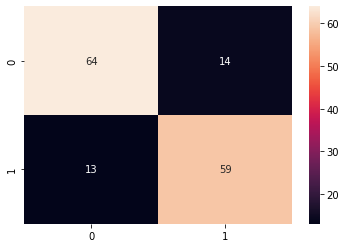

In [77]:
# Create a confuion_matrix plot for the baseline model
sns.heatmap(confusion_matrix(target_test, test_pred), annot=True)
# Show the plot
plt.show()

**Observation**
* The baseline model had an accuracy of 86% on the train set
* The baseline model had an accuracy of 82% on the test set
* It can be seen that the baseline model had a high accuracy
* The precision, recall and f1-score is very high, hence the model performs very well in predicting people with or without diabetes

In [70]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# Instantiate Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_classifier.fit(transformed_features_train, target_train)

# Make predictions on the test data
rf_train_pred = rf_classifier.predict(transformed_features_train)
# Get the classification report of train set
print(classification_report(target_train, rf_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       312
           1       1.00      1.00      1.00       284

    accuracy                           1.00       596
   macro avg       1.00      1.00      1.00       596
weighted avg       1.00      1.00      1.00       596



In [71]:
# Get test prediction
rf_test_pred = rf_classifier.predict(transformed_features_test)
# Get the classification report of test set
print(classification_report(target_test, rf_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        78
           1       0.85      0.85      0.85        72

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150



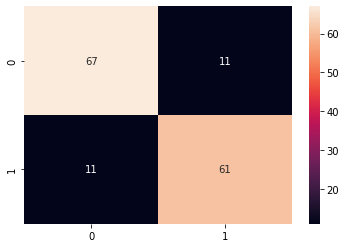

In [79]:
# Create a confuion_matrix plot for the baseline model
sns.heatmap(confusion_matrix(target_test, rf_test_pred), annot=True)
# Show the plot
plt.show()

**Observation**
* The Random Forest Classifier model had an accuracy of 100% on the train set.
* The Random Forest Classifier model had an accuracy of 85% on the test set.
* It can be seen that the Random Forest Classifier model had a high accuracy.
* The precision, recall and f1-score is very high, hence the model performs very well in predicting people with or without diabetes.
* The Random Forest Classifier model performed better than the baseline model.

In [72]:
# Import Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
# Instantiate the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
# Fit the model to the training data
gb_classifier.fit(transformed_features_train, target_train)

# Make predictions on the test data
gb_train_pred = gb_classifier.predict(transformed_features_train)
# Get the classification report of train set
print(classification_report(target_train, gb_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       312
           1       0.96      0.97      0.96       284

    accuracy                           0.96       596
   macro avg       0.96      0.97      0.96       596
weighted avg       0.96      0.96      0.96       596



In [73]:
# Get test prediction
gb_test_pred = gb_classifier.predict(transformed_features_test)
# Get the classification report of test set
print(classification_report(target_test, gb_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86        78
           1       0.83      0.88      0.85        72

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150



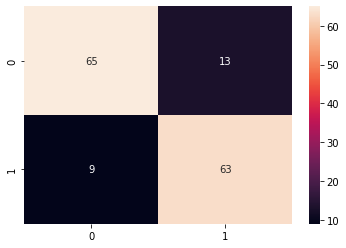

In [78]:
# Create a confuion_matrix plot for the baseline model
sns.heatmap(confusion_matrix(target_test, gb_test_pred), annot=True)
# Show the plot
plt.show()

**Observation**
* The Gradient Boosting Classifier model had an accuracy of 97% on the train set.
* The Gradient Boosting Classifier model had an accuracy of 85% on the test set.
* It can be seen that the Gradient Boosting Classifier model had a high accuracy.
* The precision, recall and f1-score is very high, hence the model performs very well in predicting people with or without heart diseases.
* The Gradient Boosting Classifier model performed better than the baseline model.

In [74]:
# Import XGBClassifier
from xgboost import XGBClassifier
# Instantiate XGBoost Classifier
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)
# Fit the model to the training data
xgb_classifier.fit(transformed_features_train, target_train)
# Make predictions on the test data
xgb_train_pred = xgb_classifier.predict(transformed_features_train)
# Get the classification report of train set
print(classification_report(target_train, xgb_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       312
           1       1.00      1.00      1.00       284

    accuracy                           1.00       596
   macro avg       1.00      1.00      1.00       596
weighted avg       1.00      1.00      1.00       596



In [75]:
# Get test prediction
xgb_test_pred = xgb_classifier.predict(transformed_features_test)
# Get the classification report of test set
print(classification_report(target_test, xgb_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        78
           1       0.81      0.83      0.82        72

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



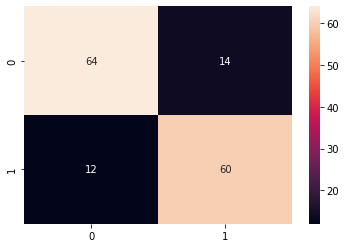

In [80]:
# Create a confuion_matrix plot for the baseline model
sns.heatmap(confusion_matrix(target_test, xgb_test_pred), annot=True)
# Show the plot
plt.show()

**Observation**
* The XGBoost Classifier model had an accuracy of 100% on the train set.
* The XGBoost Classifier model had an accuracy of 83% on the test set.
* It can be seen that the XGBoost Classifier model had a high accuracy.
* The precision, recall and f1-score is very high, hence the model performs very well in predicting people with or without heart diseases.
* The XGBoost Classifier model performed better than the baseline model.

**Note**
* Gradient Boosting Classifier and Random Forest Classifier are the two best in predicting heart disease hence we choose the best model from the cross validation as the model for deployment

## Cross Validation

#### Cross Validation For Gradient Boosting Classifier

In [87]:
# Preprocess the entire dataset
features_preprocessed = preprocessor.transform(features)
target_transformed = target.replace({'No':0,'Yes':1})
# Import Cross_val_predict
from sklearn.model_selection import cross_val_predict
# Perform cross-validated predictions
gb_validated_pred = cross_val_predict(gb_classifier, features_preprocessed, target_transformed, cv=5)
# create classification report
print(classification_report(target_transformed, gb_validated_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       390
           1       0.83      0.83      0.83       356

    accuracy                           0.84       746
   macro avg       0.84      0.84      0.84       746
weighted avg       0.84      0.84      0.84       746



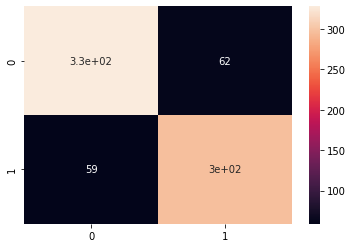

In [88]:
# Create a confuion_matrix plot for the baseline model
sns.heatmap(confusion_matrix(target_transformed, gb_validated_pred), annot=True)
# Show the plot
plt.show()

#### Cross Validation For Random Forest Classifier

In [89]:
# Perform cross-validated predictions
rf_validated_pred = cross_val_predict(rf_classifier, features_preprocessed, target_transformed, cv=5)
# create classification report
print(classification_report(target_transformed, rf_validated_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       390
           1       0.85      0.87      0.86       356

    accuracy                           0.86       746
   macro avg       0.86      0.86      0.86       746
weighted avg       0.86      0.86      0.86       746



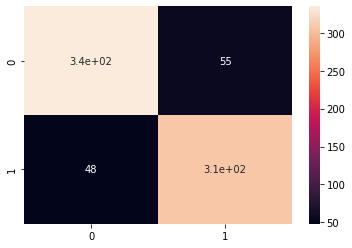

In [90]:
# Create a confuion_matrix plot for the baseline model
sns.heatmap(confusion_matrix(target_transformed, rf_validated_pred), annot=True)
# Show the plot
plt.show()

**Note**
* RandomForest Classifier is the best model and hence it will be used for the model deployment.

## Extract Model and Preprocessor

In [92]:
import pickle

# Assuming your model is named gb_classifier and your preprocessor is named preprocessor

# Save the trained model to a file
with open('model.pkl', 'wb') as f:
    pickle.dump(rf_classifier, f)

# Save the preprocessor to a file
with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)